## Загрузка, анализ и обработка данных из PostgresSQL

In [8]:
import psycopg2
import pandas as pd

DB_NAME = "postgres"
DB_USER = "postgres"
DB_PASSWORD = "1"
DB_HOST = "localhost"  
DB_PORT = "5432"  

# Подключение к базе
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT
)

cursor = conn.cursor()


In [ ]:
query = "SELECT * FROM campaigns;"
campaigns = pd.read_sql(query, conn)

campaigns.head()


In [10]:

cursor.close()
conn.close()


In [17]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    50 non-null     int64  
 1   campaign_name  50 non-null     object 
 2   start_date     50 non-null     object 
 3   end_date       50 non-null     object 
 4   impressions    50 non-null     int64  
 5   clicks         50 non-null     int64  
 6   conversions    50 non-null     int64  
 7   revenue        50 non-null     float64
 8   status         50 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.6+ KB


In [18]:
campaigns_df=campaigns
campaigns_df.dropna(subset=['campaign_id'], inplace=True)  # Удаляем строки с пропущенными campaign_id

# Преобразуем дату в формат datetime
campaigns_df['start_date'] = pd.to_datetime(campaigns_df['start_date'])  
campaigns_df['end_date'] = pd.to_datetime(campaigns_df['end_date'])  


In [20]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    50 non-null     int64         
 1   campaign_name  50 non-null     object        
 2   start_date     50 non-null     datetime64[ns]
 3   end_date       50 non-null     datetime64[ns]
 4   impressions    50 non-null     int64         
 5   clicks         50 non-null     int64         
 6   conversions    50 non-null     int64         
 7   revenue        50 non-null     float64       
 8   status         50 non-null     object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 3.6+ KB


## Загрузка, анализ и обработка данных из csv

In [21]:
#загрузка cvs
social_media = pd.read_csv("social-media.csv")
social_media.head()

,campaign_id,post_id,post_date,post_type,post_resourse,likes,comments,shares,clicks,reach
0,498,655,2025-04-03,Text,Instagram,1520,495,110,211,81721
1,810,928,2025-01-28,Text,Twitter,2900,262,149,357,28815
2,94,928,2025-03-19,Video,Telegram,3912,489,143,187,14916
3,471,394,2025-04-02,Image,Twitter,4942,197,122,477,15119
4,194,386,2025-02-20,Text,Facebook,3403,145,194,405,59541


In [22]:
social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    50 non-null     int64 
 1   post_id        50 non-null     int64 
 2   post_date      50 non-null     object
 3   post_type      50 non-null     object
 4   post_resourse  50 non-null     object
 5   likes          50 non-null     int64 
 6   comments       50 non-null     int64 
 7   shares         50 non-null     int64 
 8   clicks         50 non-null     int64 
 9   reach          50 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 4.0+ KB


In [24]:
df_social_media=social_media

df_social_media.dropna(subset=['post_id'], inplace=True) 
df_social_media['post_date'] = pd.to_datetime(df_social_media['post_date'])

In [25]:
df_social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    50 non-null     int64         
 1   post_id        50 non-null     int64         
 2   post_date      50 non-null     datetime64[ns]
 3   post_type      50 non-null     object        
 4   post_resourse  50 non-null     object        
 5   likes          50 non-null     int64         
 6   comments       50 non-null     int64         
 7   shares         50 non-null     int64         
 8   clicks         50 non-null     int64         
 9   reach          50 non-null     int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 4.0+ KB


## Загрузка, анализ и обработка данных из excel

In [26]:
# загрузка данных из Excel
budget = pd.read_excel("budget.xlsx")
budget.head()

,campaign_id,date,budget,source
0,498,2025-01-16,8895,Display Ads
1,810,2025-01-20,5595,TV
2,94,2025-02-26,8293,Search Ads
3,471,2025-03-31,9194,Search Ads
4,194,2025-01-23,3573,Search Ads


In [27]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaign_id  50 non-null     int64         
 1   date         50 non-null     datetime64[ns]
 2   budget       50 non-null     int64         
 3   source       50 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ KB


In [28]:
df_budget=budget

df_budget.dropna(subset=['budget'], inplace=True)

In [29]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaign_id  50 non-null     int64         
 1   date         50 non-null     datetime64[ns]
 2   budget       50 non-null     int64         
 3   source       50 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ KB


## Объединение данных

In [30]:

df_combined = pd.merge(campaigns_df, df_social_media, on='campaign_id', how='outer')
df_combined = pd.merge(df_combined, df_budget, on='campaign_id', how='outer')

df_combined.head()


,campaign_id,campaign_name,start_date,end_date,impressions,clicks_x,conversions,revenue,status,post_id,...,post_type,post_resourse,likes,comments,shares,clicks_y,reach,date,budget,source
0,11,"Wright, Adams and Underwood",2025-02-07,2025-03-08,224929,29327,970,15641.0,Active,589,...,Image,Instagram,1675,261,191,193,11683,2025-03-03,3847,Social Media
1,13,Evans and Sons,2025-03-17,2025-02-11,708458,29185,821,17219.0,Active,479,...,Text,Twitter,1091,117,138,281,75623,2025-01-08,1600,Social Media
2,21,Mueller Inc,2025-02-04,2025-01-19,296383,23034,957,15513.0,Active,242,...,Video,Instagram,3393,308,101,210,61095,2025-02-20,6249,Display Ads
3,58,"Fuller, James and Reid",2025-01-05,2025-01-19,933541,6797,795,12793.0,Paused,68,...,Image,Facebook,2324,109,173,160,62535,2025-02-25,9893,Display Ads
4,75,"Johnson, Tanner and Cunningham",2025-03-28,2025-03-18,549107,6236,126,4089.0,Active,302,...,Text,Twitter,1087,307,159,156,53806,2025-03-26,2955,Search Ads


In [32]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_id      50 non-null     int64         
 1   campaign_name    50 non-null     object        
 2   start_date       50 non-null     datetime64[ns]
 3   end_date         50 non-null     datetime64[ns]
 4   impressions      50 non-null     int64         
 5   clicks_x         50 non-null     int64         
 6   conversions      50 non-null     int64         
 7   revenue          50 non-null     float64       
 8   status           50 non-null     object        
 9   post_id          50 non-null     int64         
 10  post_date        50 non-null     datetime64[ns]
 11  post_type        50 non-null     object        
 12  post_resourse    50 non-null     object        
 13  likes            50 non-null     int64         
 14  comments         50 non-null     int64      

## Метрики и визуализация

In [33]:
# Новые метрики
df_metricks=df_combined

df_metricks['conversion_rate'] = (df_metricks['conversions'] / df_metricks['impressions']) * 100
df_metricks['cpc'] = df_metricks['budget'] / df_metricks['clicks_x']
df_metricks['roi'] = (df_metricks['revenue'] - df_metricks['budget']) / df_metricks['budget']


In [34]:
df_metricks.head()

,campaign_id,campaign_name,start_date,end_date,impressions,clicks_x,conversions,revenue,status,post_id,...,comments,shares,clicks_y,reach,date,budget,source,conversion_rate,cpc,roi
0,11,"Wright, Adams and Underwood",2025-02-07,2025-03-08,224929,29327,970,15641.0,Active,589,...,261,191,193,11683,2025-03-03,3847,Social Media,0.431247,0.131176,3.065766
1,13,Evans and Sons,2025-03-17,2025-02-11,708458,29185,821,17219.0,Active,479,...,117,138,281,75623,2025-01-08,1600,Social Media,0.115885,0.054823,9.761875
2,21,Mueller Inc,2025-02-04,2025-01-19,296383,23034,957,15513.0,Active,242,...,308,101,210,61095,2025-02-20,6249,Display Ads,0.322893,0.271295,1.482477
3,58,"Fuller, James and Reid",2025-01-05,2025-01-19,933541,6797,795,12793.0,Paused,68,...,109,173,160,62535,2025-02-25,9893,Display Ads,0.085160,1.455495,0.293137
4,75,"Johnson, Tanner and Cunningham",2025-03-28,2025-03-18,549107,6236,126,4089.0,Active,302,...,307,159,156,53806,2025-03-26,2955,Search Ads,0.022946,0.473861,0.383756


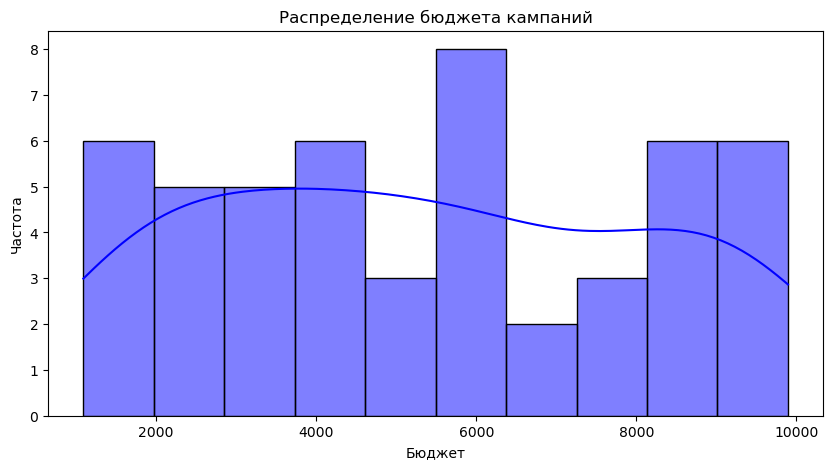

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

plt.figure(figsize=(10,5))
sns.histplot(df_metricks["budget"], bins=10, kde=True, color="blue")
plt.title("Распределение бюджета кампаний")
plt.xlabel("Бюджет")
plt.ylabel("Частота")
plt.show()

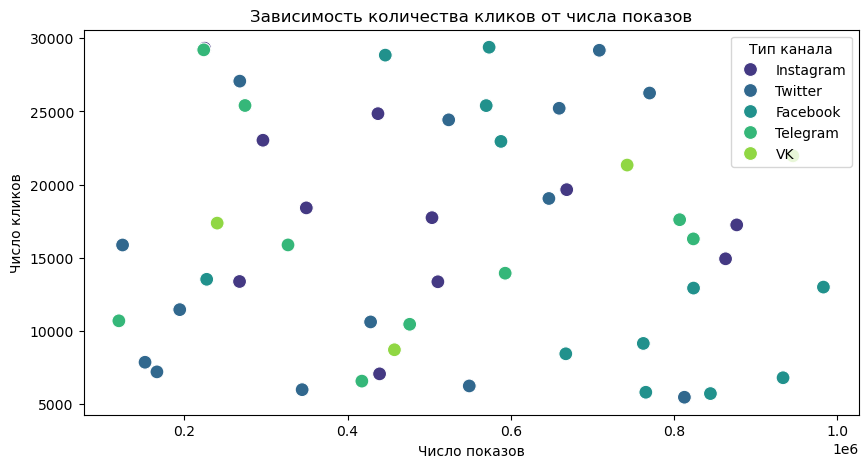

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_metricks["impressions"], y=df_metricks["clicks_x"],hue=df_metricks["post_resourse"], palette="viridis", s=100)
plt.title("Зависимость количества кликов от числа показов")
plt.xlabel("Число показов")
plt.legend(title="Тип канала")
plt.ylabel("Число кликов")
plt.show()

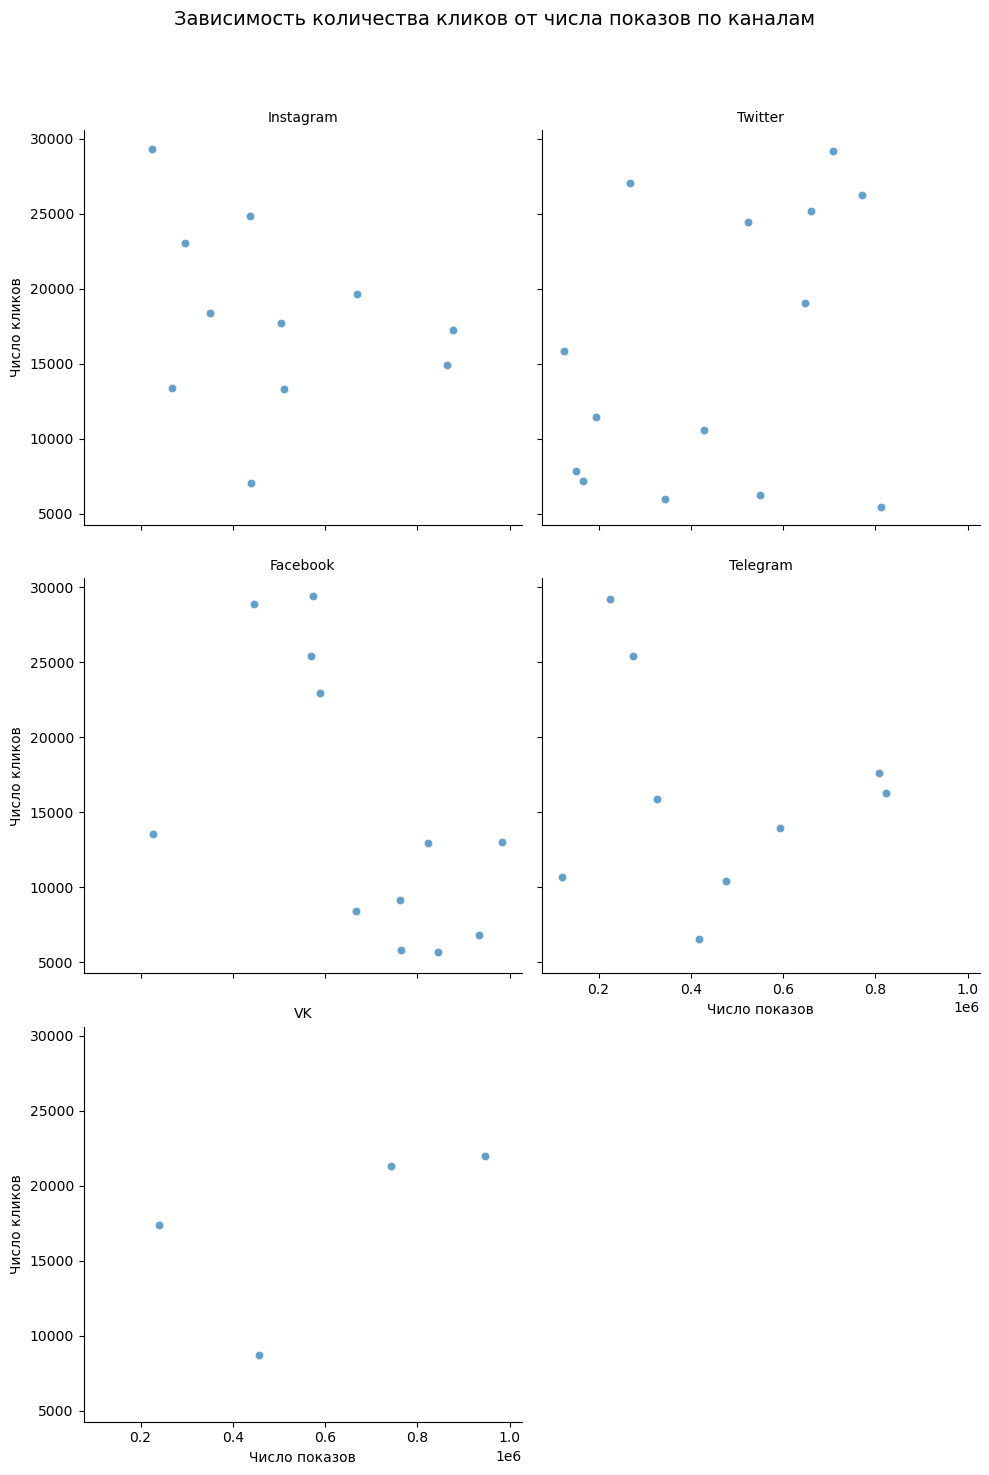

In [62]:

g = sns.FacetGrid(df_metricks, col="post_resourse", col_wrap=2, height=5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="impressions", y="clicks_x", alpha=0.7)

g.set_axis_labels("Число показов", "Число кликов")  
g.set_titles(col_template="{col_name}")  

g.fig.suptitle("Зависимость количества кликов от числа показов по каналам", fontsize=14)  
plt.subplots_adjust(top=0.9)  
plt.show()

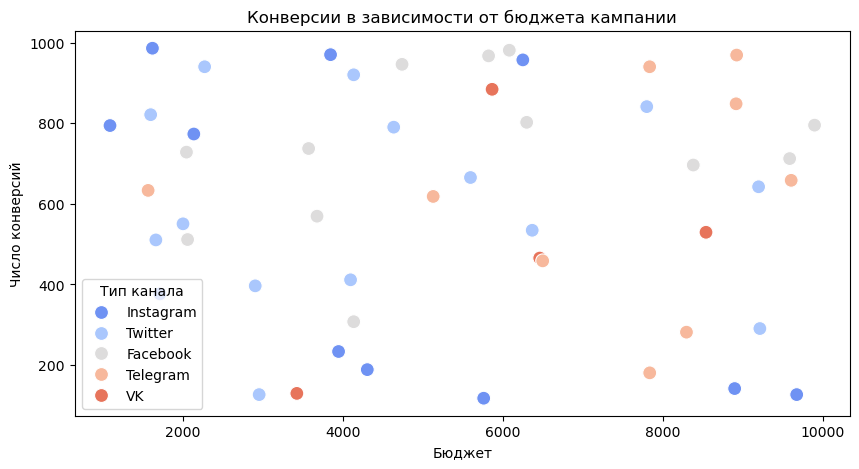

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_metricks["budget"], y=df_metricks["conversions"], hue=df_metricks["post_resourse"], palette="coolwarm", s=100)
plt.title("Конверсии в зависимости от бюджета кампании")
plt.xlabel("Бюджет")
plt.ylabel("Число конверсий")
plt.legend(title="Тип канала")
plt.show()

C:\Users\alnys\AppData\Local\Temp\ipykernel_21288\3608744102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_metricks["post_resourse"], y=df_metricks["revenue"], palette="Set2")


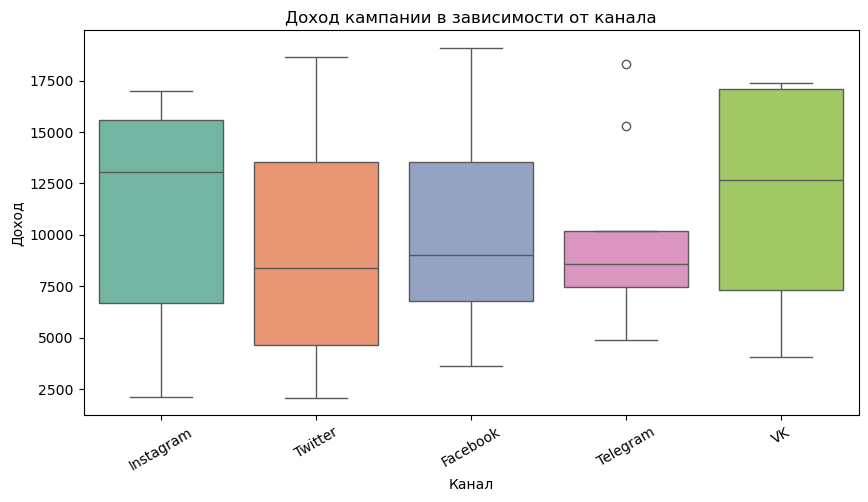

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_metricks["post_resourse"], y=df_metricks["revenue"], palette="Set2")
plt.title("Доход кампании в зависимости от канала")
plt.xlabel("Канал")
plt.ylabel("Доход")
plt.xticks(rotation=30)
plt.show()

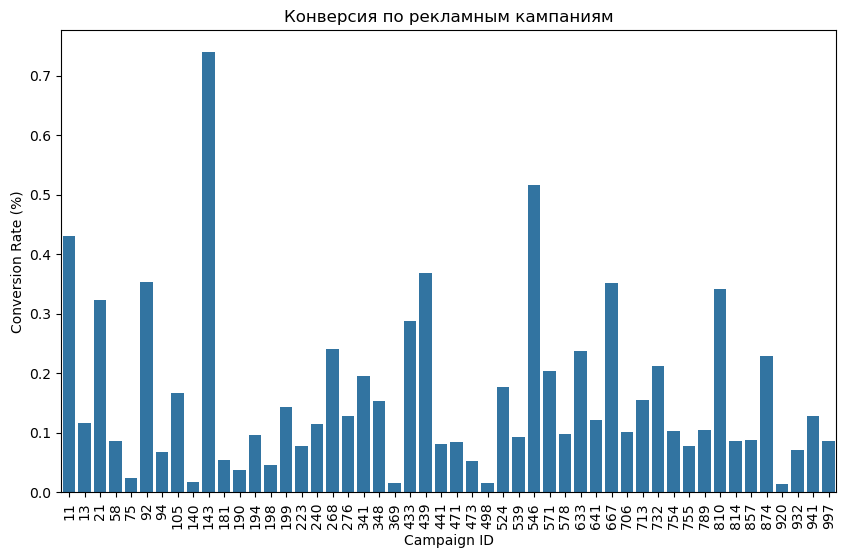

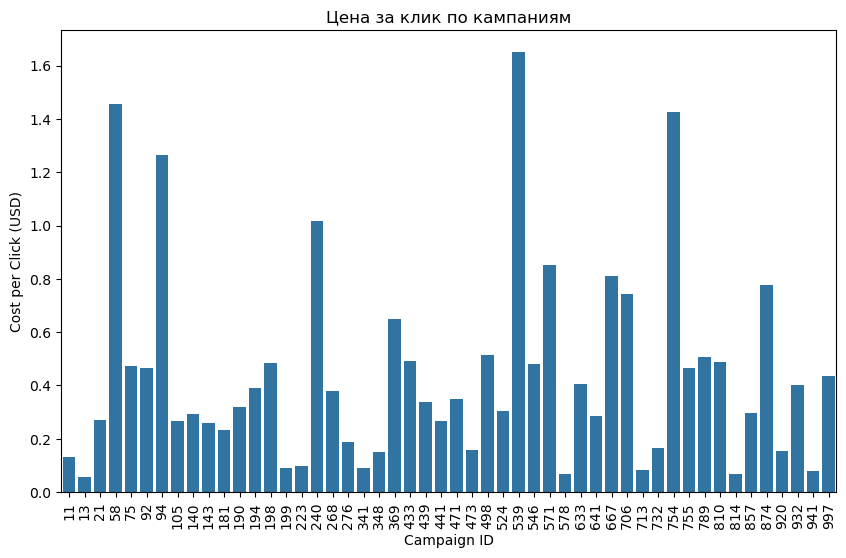

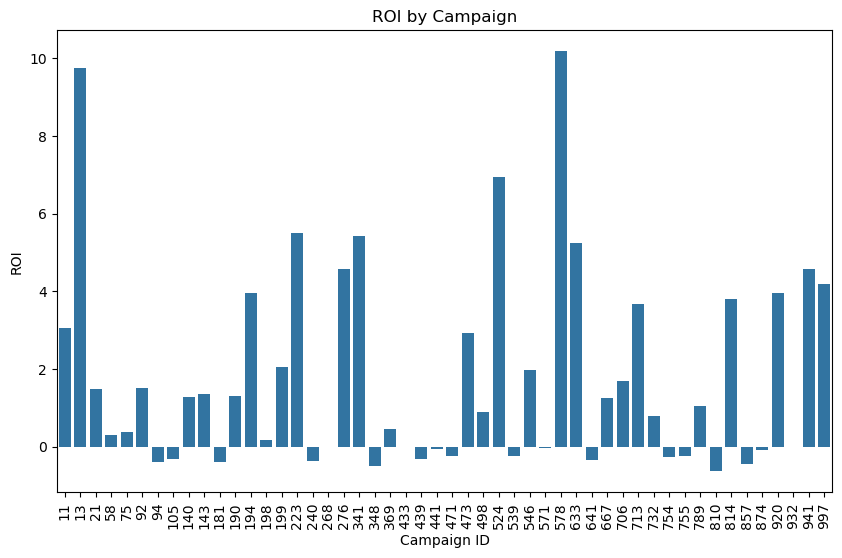

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Конверсия
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_id', y='conversion_rate', data=df_metricks)
plt.title('Конверсия по рекламным кампаниям')
plt.xlabel('Campaign ID')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Цена за клик по кампаниям
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_id', y='cpc', data=df_metricks)
plt.title('Цена за клик по кампаниям')
plt.xlabel('Campaign ID')
plt.ylabel('Cost per Click (USD)')
plt.xticks(rotation=90)
plt.show()

# График по ROI
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_id', y='roi', data=df_metricks)
plt.title('ROI by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('ROI')
plt.xticks(rotation=90)
plt.show()
